* **CONTENTS**
    * Notes on Feature Engineering
    * Dealing with Outliers
    * Dealing with Missing data - Evaluation of Missing Data
    * Dealing with Missing data - Filling or Dropping data based on rows
    * Dealing with Missing data - Fixing based on Columns
    * Dealing with Categorical Data - Encoding Options

### NOTES ON FEATURE ENGINEERNG:

* What is featuring Engineering:
    * Is the process of using domain knowledge to extract features from raw data via data mining techniques.
* Three general Approaches:
    * Extracting Information
    * Combining Information
    * Transforming Information
* Often categorical data is presented as a string data
    * Type methods for handling categorical information:
        * Integer Encoding - Directly convert categories into integers 1,2,3,... N. Possible issue is implied Ordering and relationship (ordinal Variable). This may or maynot make sense based on the feature or Domain. Always carefully consider implication of integer encoding.
            * Pros:
                * Very easy to do and understand.
                * Does not increase the number of features
            * Cons:
                * Implies ordered relationships between categories
        * One-hot Encoding (Dummy Variables) - Converts each category into individual features that are either 0 or 1. No ordered realtionship is implied between categories. However we greatly expanded our feature set, many more columns. We can try to reduce this feature column expansion by creating higher level categories.Using pandas **.map() or .apply()** can achieve this. May require a lot of tuning and domain experience to choose reasonable higher level categories or mapping. Also must be aware of the "Dummy variable trap" mathematically know as multi-collinearity. Converting to dummy variables can cause features to be doubled.
            * Pros:
                * No ordering implied.
            * Cons:
                * Potential to create many more feature columns and coefficients .
                * Dummy variable trap consideration
                * Not easy to create new categories.
        

### DEALING WITH OUTLIERS

* Often a data set will have a few points that are extreme outliers.
* It's often better to simply remove these few points from the data set in orger to have a more generalized model 
* Outlier Consideration:
    * Definition of an outlier.
        * Range and limits :
            * We need to decide what will constitute an outlier with some techology:
                * InterQuartile Range
                * Standard Deviation
                * Visualized and Domain Limit Value
        * Percentage of data
            * Keep in mind if a large percentage of the data is being labeled as an outlier. then you actually just have a wide distribution , not outliers!
            * Limit outliers to a few percentage point a most

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [5]:
sample = create_ages() #Calling the function "create_ages"
sample # Gives a list of random ages, normally distributed

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

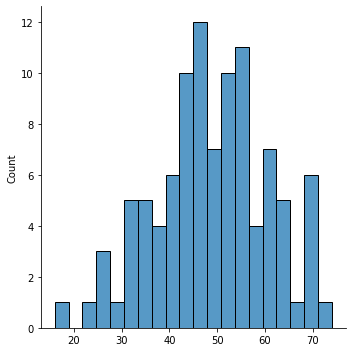

In [6]:
sns.displot(sample, bins=20) # Gives the distribution plot for the random ages

C:\Users\Manikandan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


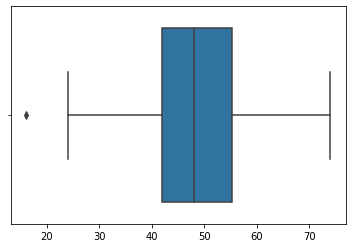

In [7]:
sns.boxplot(sample) #The dot is the outlier

In [9]:
ser = pd.Series(sample) # Organizing the series
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
5     47.0
6     71.0
7     60.0
8     44.0
9     57.0
10    44.0
11    44.0
12    53.0
13    25.0
14    28.0
15    43.0
16    37.0
17    54.0
18    38.0
19    32.0
20    69.0
21    47.0
22    51.0
23    31.0
24    43.0
25    51.0
26    35.0
27    55.0
28    42.0
29    46.0
      ... 
70    55.0
71    70.0
72    50.0
73    70.0
74    16.0
75    61.0
76    51.0
77    46.0
78    51.0
79    24.0
80    47.0
81    55.0
82    69.0
83    43.0
84    39.0
85    43.0
86    62.0
87    54.0
88    43.0
89    57.0
90    51.0
91    63.0
92    41.0
93    46.0
94    45.0
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [10]:
ser.describe() #Gives the description of the variable ser

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [11]:
IQR = 55.25-42.0 # Gives the difference between the 75th percentile and the 25th percentile
lower_limit = 42- 1.5*(IQR) # To find the lower_limit age
lower_limit

22.125

In [12]:
ser[ser>lower_limit] # gives the series which are above the lower limit. basically gets rid of the lower limit value. To get rid of the outlier

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
5     47.0
6     71.0
7     60.0
8     44.0
9     57.0
10    44.0
11    44.0
12    53.0
13    25.0
14    28.0
15    43.0
16    37.0
17    54.0
18    38.0
19    32.0
20    69.0
21    47.0
22    51.0
23    31.0
24    43.0
25    51.0
26    35.0
27    55.0
28    42.0
29    46.0
      ... 
69    42.0
70    55.0
71    70.0
72    50.0
73    70.0
75    61.0
76    51.0
77    46.0
78    51.0
79    24.0
80    47.0
81    55.0
82    69.0
83    43.0
84    39.0
85    43.0
86    62.0
87    54.0
88    43.0
89    57.0
90    51.0
91    63.0
92    41.0
93    46.0
94    45.0
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [13]:
np.percentile(sample, [75,25])# give the array(sample) and the percentile details(75,25) in this case. This step can be used in the place of describe

array([55.25, 42.  ])

In [14]:
q75,q25 = np.percentile(sample, [75,25]) # Tuple unpacking
q75 # Prints the 75th percentile

55.25

In [15]:
iqr = q75-q25 # Gets the iqr with the unpacked tuple. Just an easier way to do the above (lower_limit) steps
iqr

13.25

In [16]:
q25 - 1.5 * iqr # Gets the lower limit age

22.125

In [20]:
df= pd.read_csv('C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/Ames_Housing_Data.csv') #Reading the file from the folder. Remember change the '\' in the path to '/'
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
df.corr() # Gives the correlated dataframe

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [22]:
df.corr()['SalePrice'] # Gives every single features correlation with the SalePrice. Here the Overall Quality is highly correlated with the sale price(positive correaltion)

PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0.015691
Mo Sold            0

In [23]:
df.corr()['SalePrice'].sort_values() # Sorts the Correlation values

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

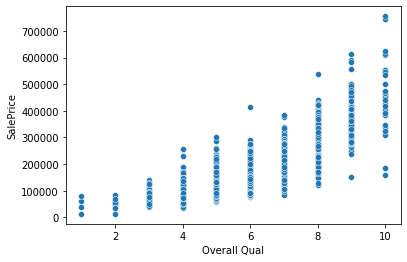

In [24]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data =df)
# Here as the Quality goes up the Sale Price goes up. 
# Here we see some points that lie outside the trend for that particular quality

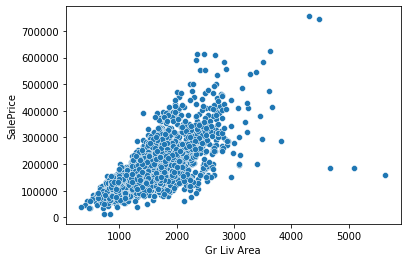

In [25]:
sns.scatterplot(data=df , x= 'Gr Liv Area', y= 'SalePrice') # Plotting a scatterplot between the Living area (The next highest correlated data) and the sale price

In [27]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)] # Gives a Dataframe with the entries where the Overall Quality is greater than 8 and the SalePrice is less than 200000
# These 4 points are the Outliers for two features. These 4 pointers are of very high quality and large houses which for some reason are at bargain price.
# These 4 points are outliers that we wouldn't want in the model as these don't follow the trend and this can ruin the models ability to generalize

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [28]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)] # gives the entries for which have the sale price less than 400000 and the Living area greater than 4000

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [30]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index# Gets the Index of the entries for which the condition was true
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [32]:
df= df.drop(drop_ind, axis=0) # Redefining the Dataframe by dropping the index of the outliers

# The error is shown as the cell was executed again and since the index were dropped during the execution the warning message shows up

KeyError: '[1498 2180 2181] not found in axis'

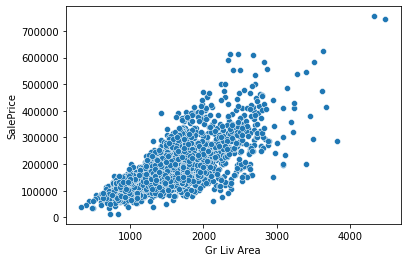

In [33]:
sns.scatterplot(data=df , x= 'Gr Liv Area', y= 'SalePrice') # Plotting the Sale vs Living area after removing the 3 houses which were an outlier

### DEALING WITH MISSING DATA: PART ONE - EVALUATION OF MISSING DATA

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
with open('C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/Ames_Housing_Feature_Description.txt','r') as f: # Opens the text file in read mode ('r') and sets it to the variable f.
    print(f.read()) # Reads and prints the results
# The with operator allows us to automatically close the file instead of holding it open even after we read it
# The output given has the name of the feature, a general description of it and then it its categorical, what are the categories it is representing

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [37]:
df = pd.read_csv("C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/Ames_outliers_removed.csv") #This csv has the data frame with the outliers removed based on the steps followed before. Note we didn't save that file as this was given with the course but generally we should save the df with outliers to be used later. 

In [39]:
df.info() # Gives the information about the Outliers removed df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
PID                2927 non-null int64
MS SubClass        2927 non-null int64
MS Zoning          2927 non-null object
Lot Frontage       2437 non-null float64
Lot Area           2927 non-null int64
Street             2927 non-null object
Alley              198 non-null object
Lot Shape          2927 non-null object
Land Contour       2927 non-null object
Utilities          2927 non-null object
Lot Config         2927 non-null object
Land Slope         2927 non-null object
Neighborhood       2927 non-null object
Condition 1        2927 non-null object
Condition 2        2927 non-null object
Bldg Type          2927 non-null object
House Style        2927 non-null object
Overall Qual       2927 non-null int64
Overall Cond       2927 non-null int64
Year Built         2927 non-null int64
Year Remod/Add     2927 non-null int64
Roof Style         2927 non-null object
Roof Matl          2

In [40]:
df.head() # The PID column is just a unique identifier. Since we have the index as the identifier we can drop the PID.
# So basically if we have any unique identifier in the DF, either use that as the index or drop it

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [41]:
df= df.drop('PID', axis=1)

In [43]:
len(df.columns) # Gives the length of the columns in the DF and here we can see that the column length has changed from 81 to 80. so the drop has been successful

80

In [45]:
df.isnull().sum() # Gives the sum of the values where the falses are considered zero and the trues are ones.
# This gives the count of rows that are missing for each features

MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2729
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [46]:
100 * df.isnull().sum() / len(df) # Gives the percentage of the missing data

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.740690
Lot Area           0.000000
Street             0.000000
Alley             93.235395
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Overall Qual       0.000000
Overall Cond       0.000000
Year Built         0.000000
Year Remod/Add     0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type       0.785787
Mas Vnr Area       0.785787
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Bsmt Qual          2.733174
                    ...    
Bedroom AbvGr      0.000000
Kitchen AbvGr      0.000000
Kitchen Qual       0.000000
TotRms AbvGrd      0.000000
Functional         0

In [57]:
def percent_missing(df): # Sends df as parameters to the function
    percent_nan = 100 * df.isnull().sum() / len(df) # Gets the percentage of missing data
    percent_nan = percent_nan[percent_nan >0]. sort_values() #Gets the features for which the missing datas are greater than zero and sorts it
    return (percent_nan)

In [58]:
percent_nan = percent_missing (df) # Function call statement, the function runs over the df
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

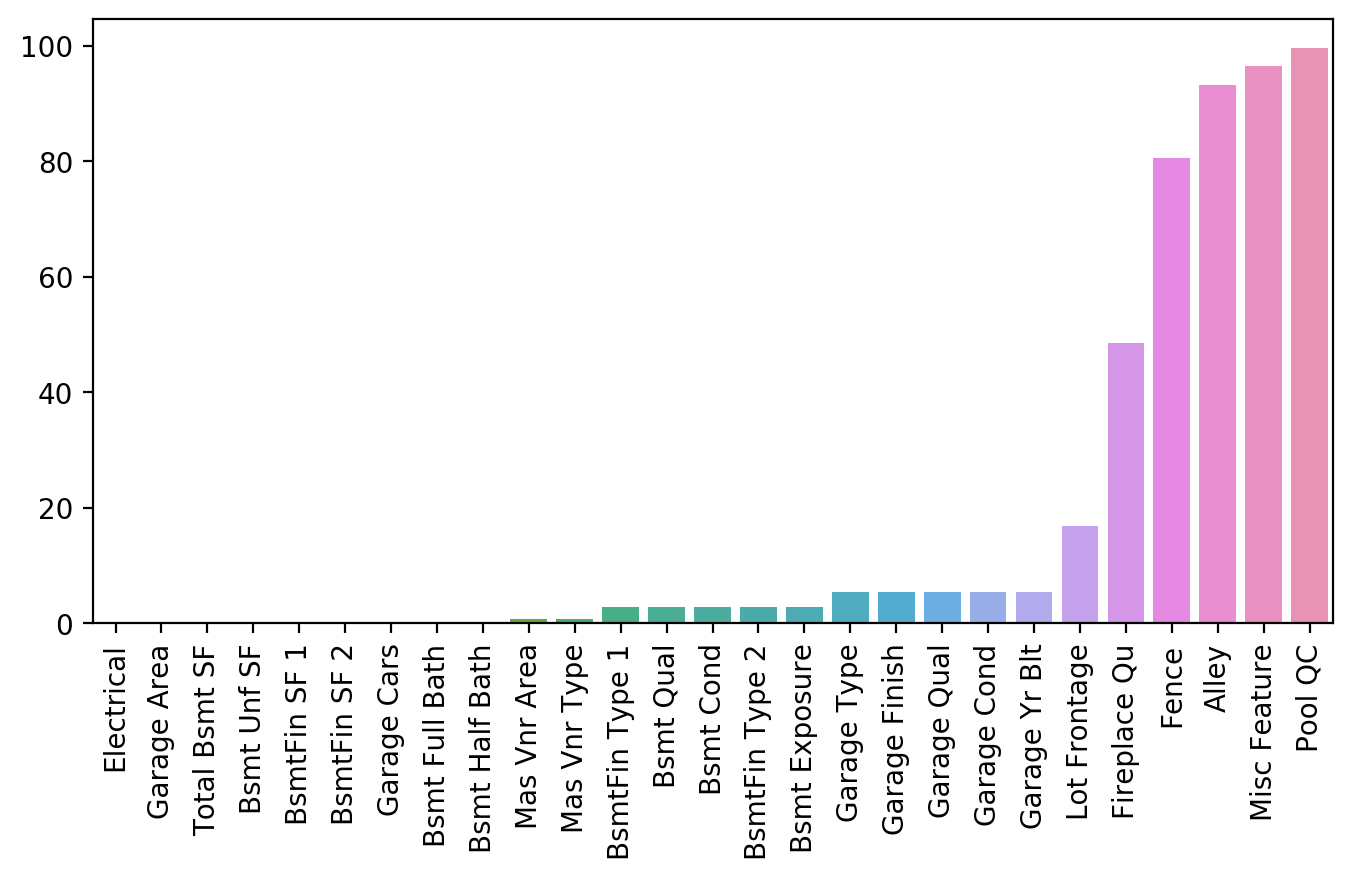

In [64]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees

### DEALING WITH MISSING DATA: PART TWO - FILLING OR DROPPING DATA BASED ON ROWS

(0, 1)

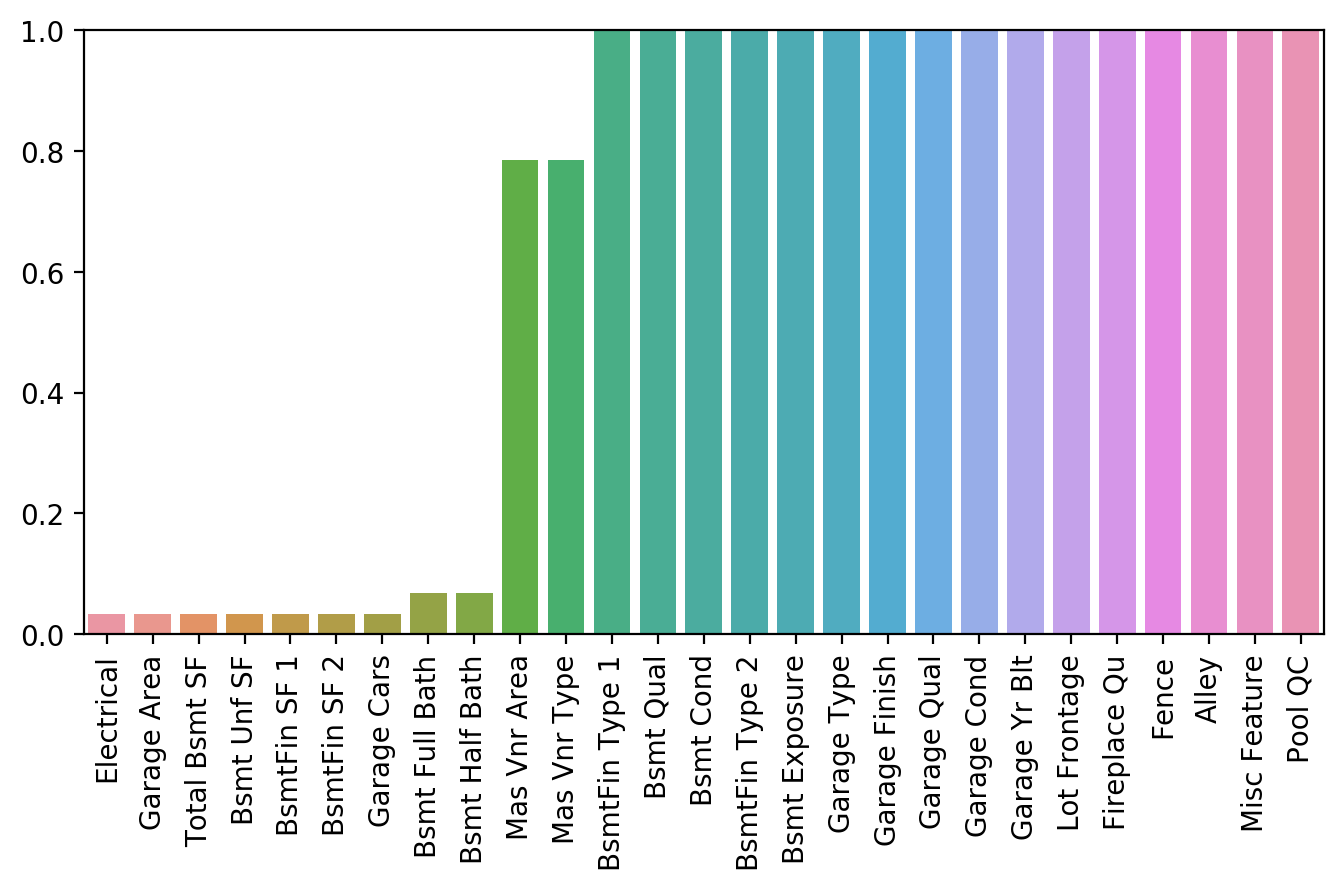

In [65]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees
plt.ylim(0,1) #Gives the plot where the y limit of the rows missing is 0 or 1 percent
# from the plot we can see that there are a few rows which have less than 1 percentage of missing data

In [66]:
percent_nan[percent_nan<1] # This gives the features that have less than one percent of missing data

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [68]:
100 /len(df) # We can see that the features like electrical, garage area etc has 0.034165 which is the same as the output
# This means that these features are exactly missing one row of missing information.

0.0341646737273659

In [71]:
df[df['Electrical'].isnull()] # This gives the df where the Electrical is null 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [72]:
df[df['Electrical'].isnull()]['Garage Area'] # This gives the value the garage area has for which the electrical is null

1576    400.0
Name: Garage Area, dtype: float64

In [70]:
df[df['Bsmt Half Bath'].isnull()] # This gives the rows for which the Basement Half Bath is null

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [73]:
df = df.dropna(axis=0,subset=['Electrical', 'Garage Cars']) # For the entire DF, take a look at the rows where we're missing the value for electrical or missing the values for Garage Cars
# We are dropping Electrica and Garage as they have null values in very less rows, If we drop the column in which the missing data percentage is more then we would be losing the a lot of datas in the dataset.
# So always make modification to the columns which affect less number of columns/ datas in the df

In [75]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by dropping the rows

In [76]:
percent_nan[percent_nan<1] #gets the df where the percentage is less than 1 percent missing

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0, 1)

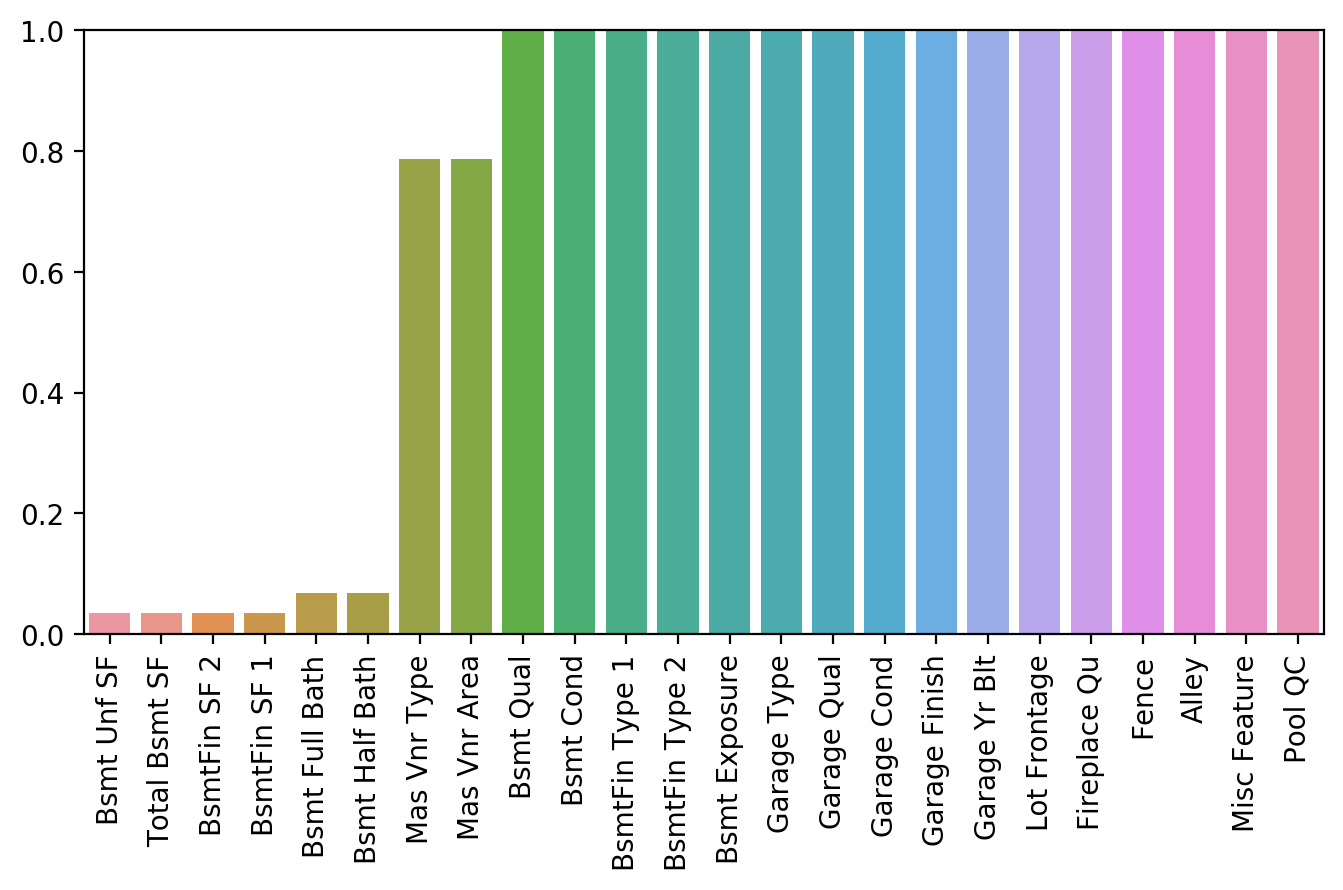

In [77]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees
plt.ylim(0,1) #Gives the plot where the y limit of the rows missing is 0 or 1 percent

In [78]:
df[df['Bsmt Half Bath'].isnull()] # Gets a df where basement half bath is null

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [79]:
df[df['Bsmt Full Bath'].isnull()] # Gets a df where basement full bath is null

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [80]:
# From the above two codes we can see that the index for both are the same which are missing data

In [81]:
df[df['Bsmt Unf SF'].isnull()] # # Gets a df where basementUnf SF is null

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [83]:
# Here we are working in numeric and strings as the BSMT is a mixture of datas of different data types. We can get the information about the datatype with f.read()

#BSMT NUMERIC COLUMNS - Fill na with 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']#All the features related to the basement which are numerics are mentioned here as the list to the varible

df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0) # fills the na with 0 for the above given column

#BSMT STRING COLUMNS
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'] # Creating a list of all the basement related string columns
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') # Fills the na with None string

C:\Users\Manikandan\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [84]:
df[df['Bsmt Full Bath'].isnull()] # Now we can see that the null values have been replaced and we don't have any null values in the BSMT FULL BATH column

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0, 1)

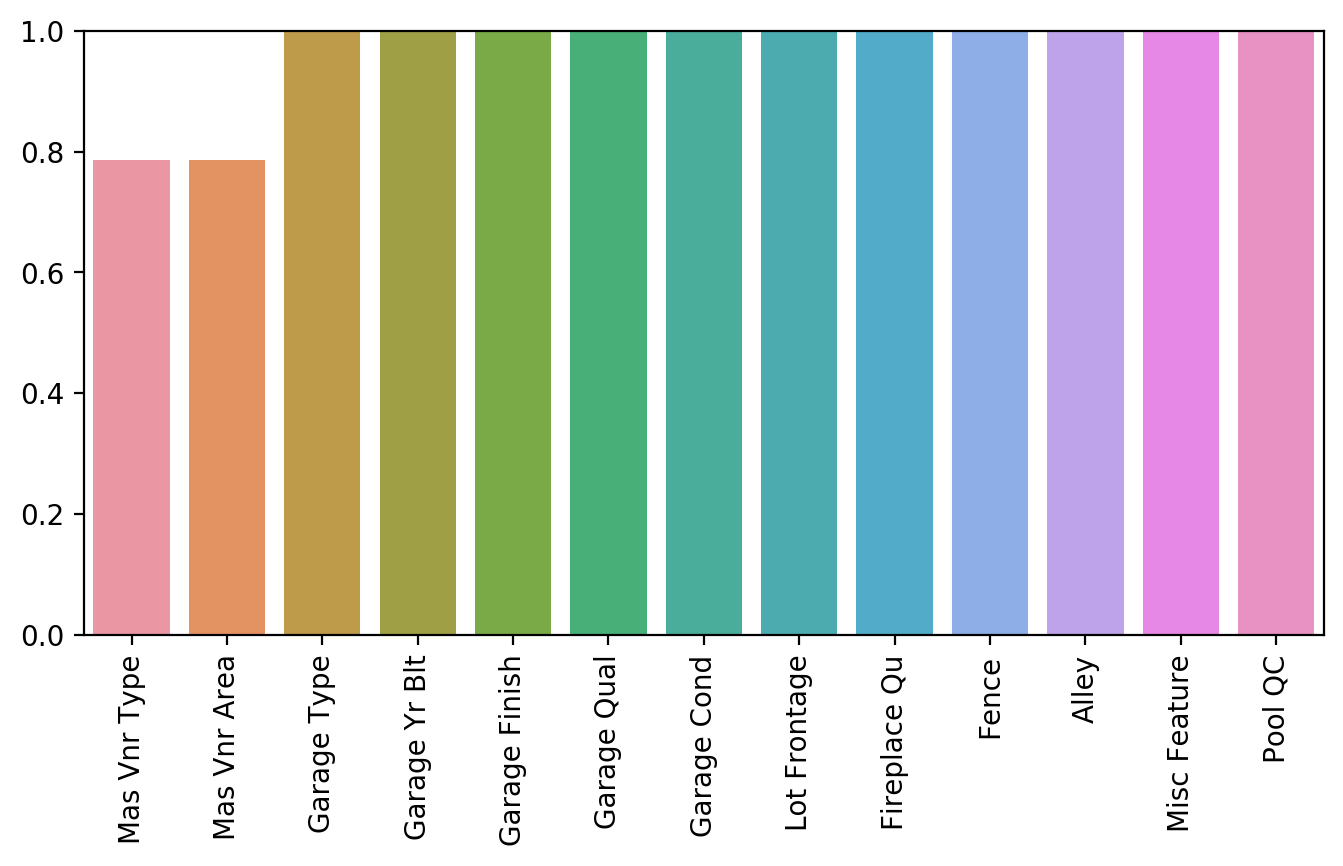

In [85]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees
plt.ylim(0,1) #Gives the plot where the y limit of the rows missing is 0 or 1 percent

# Now we can see that the missing percent rows less than 1 are only Mass Vnr type and Mass Vnr Area. If we rectify that then we would not be having much of an issue

In [86]:
# If we go back and figure it out for these two features(Mass Vnr Type and Mass Vnr Area) and after that we are no longer in the threshold range where we can consider dropping rows
# and we will have to think about the column changes.
# For low data information missing we would want to think about the column and for high number of datas missing think in the field of columns

In [87]:
# This decision on what to fill it with should be based on the text file description so that we don't mess up with the datatypes
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None") # Filling in Mass Vnr Type with string None
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0) # Filling in Mass Vnr Area with numeric 

C:\Users\Manikandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Manikandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by modifing the rows

(0, 1)

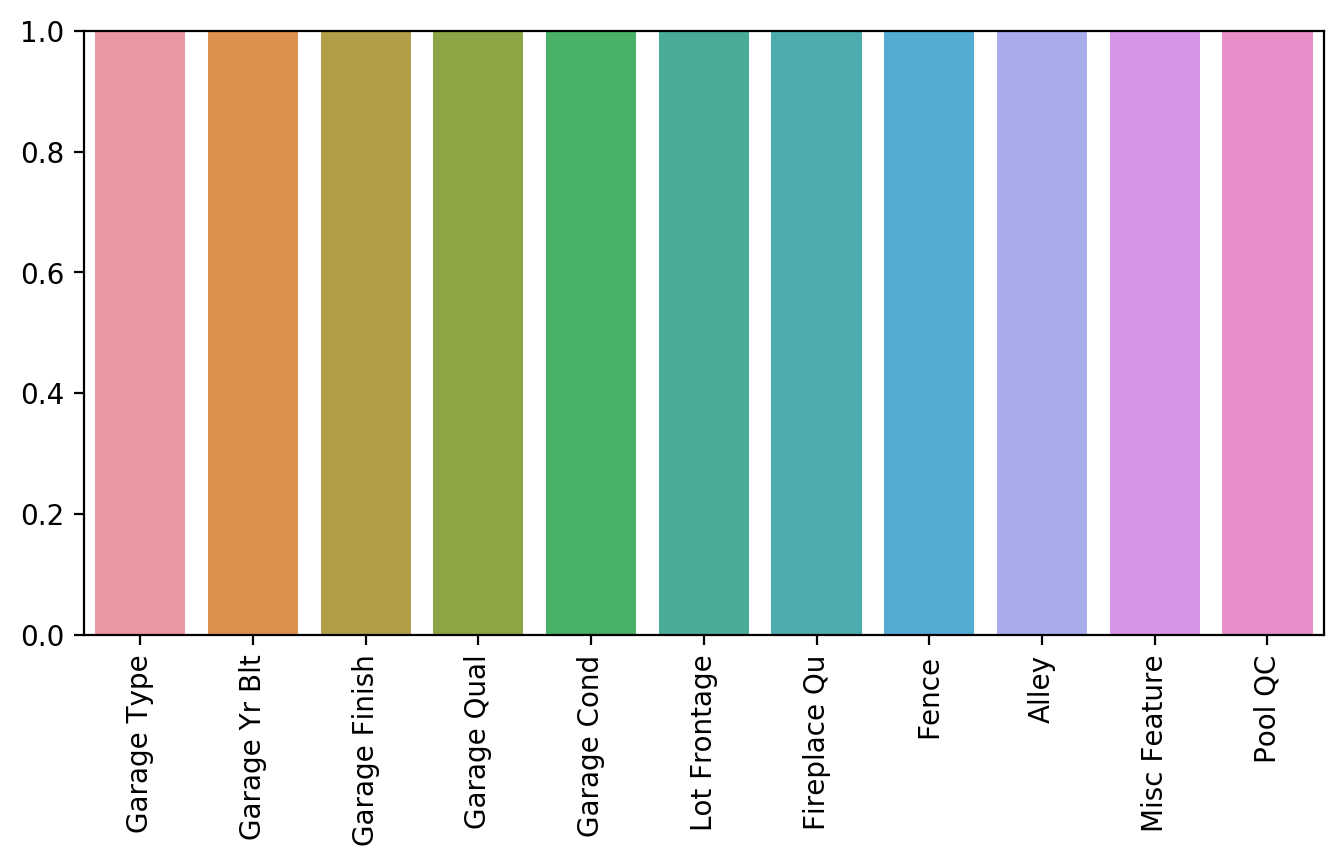

In [89]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees
plt.ylim(0,1) #Gives the plot where the y limit of the rows missing is 0 or 1 percent
# Now we can see that there are no columns under the  percent missing data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

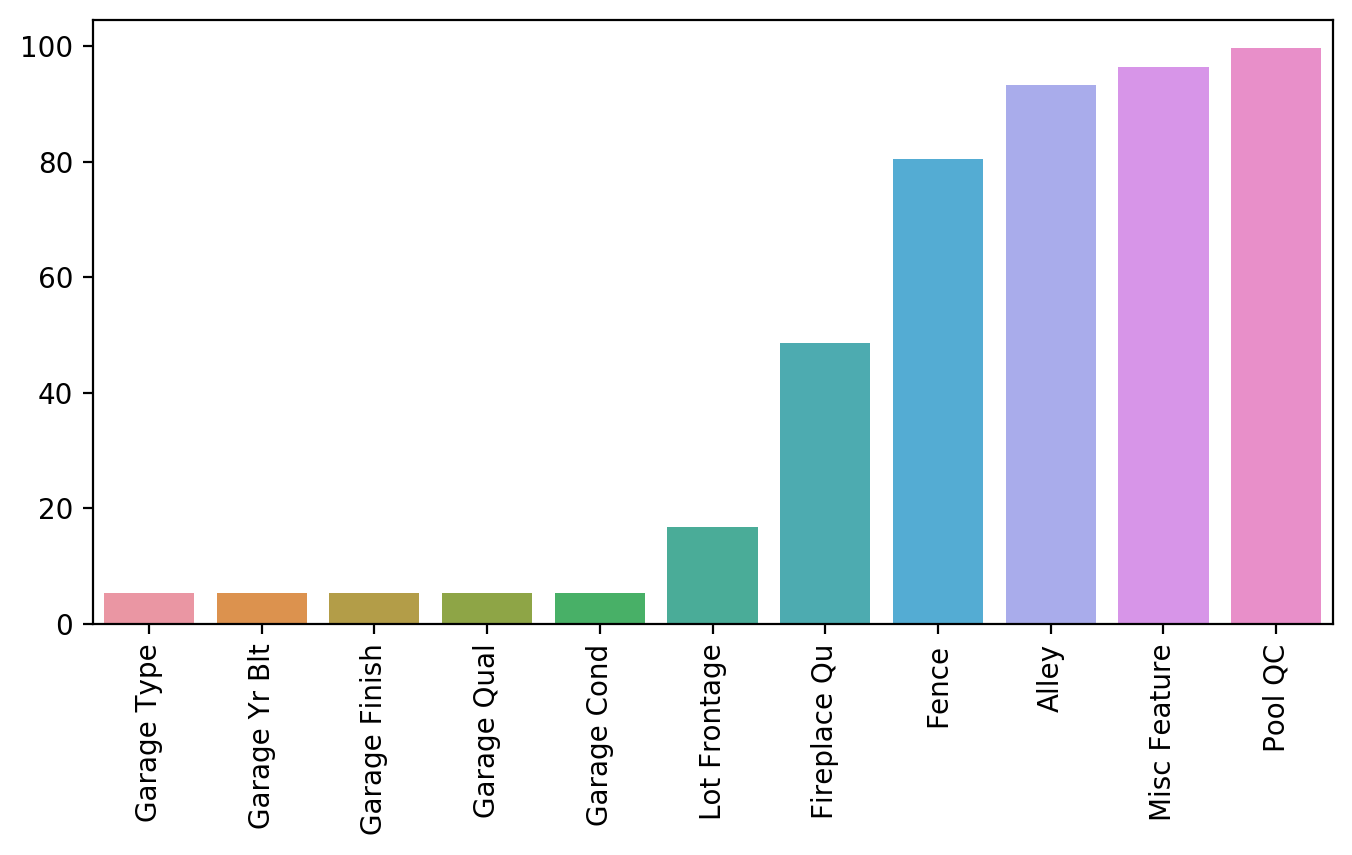

In [90]:
# Same plot as above without the y-limit

percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degrees

### DEALING WITH MISSING DATA: PART 3 - FIXING BASED ON COLUMNS

* Two main approaches here:
    * Fill in the missing values
    * Drop the feature column
    
* Dropping the feature column:
    * Very simple to do
    * No longer need to worry about that feature in the future.
    * Potential to lose a feature with possible important signal.
    * Should consider drop feature approach when many rows are NaN.
    
* Fill in the missing values:
    * Potentially changing ground truth in data.
    * Must decide on reasonable estimation to filled values.
    * Must apply transformation to all future data for predictions
    
    
* Filling in the missing feature data:
* Simplest case
    * Replace all NaN values with a reasonable assumption (e.g. zero if assumed NaN implied zero)
* Harder Case
    * Must use statistical methods based on other columns to fill in NaN values

In [93]:
gar_str_cols = ['Garage Type','Garage Finish', 'Garage Qual','Garage Cond'] # Creating a list of string qualifiers for garage and from the description it is know that we can replace NaN with None

In [95]:
df[gar_str_cols] = df[gar_str_cols].fillna('None') # fills the list obtianed above with None in the place of NaN

C:\Users\Manikandan\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [96]:
percent_nan = percent_missing(df) # Finding in the percentage nan as the df was changed now

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

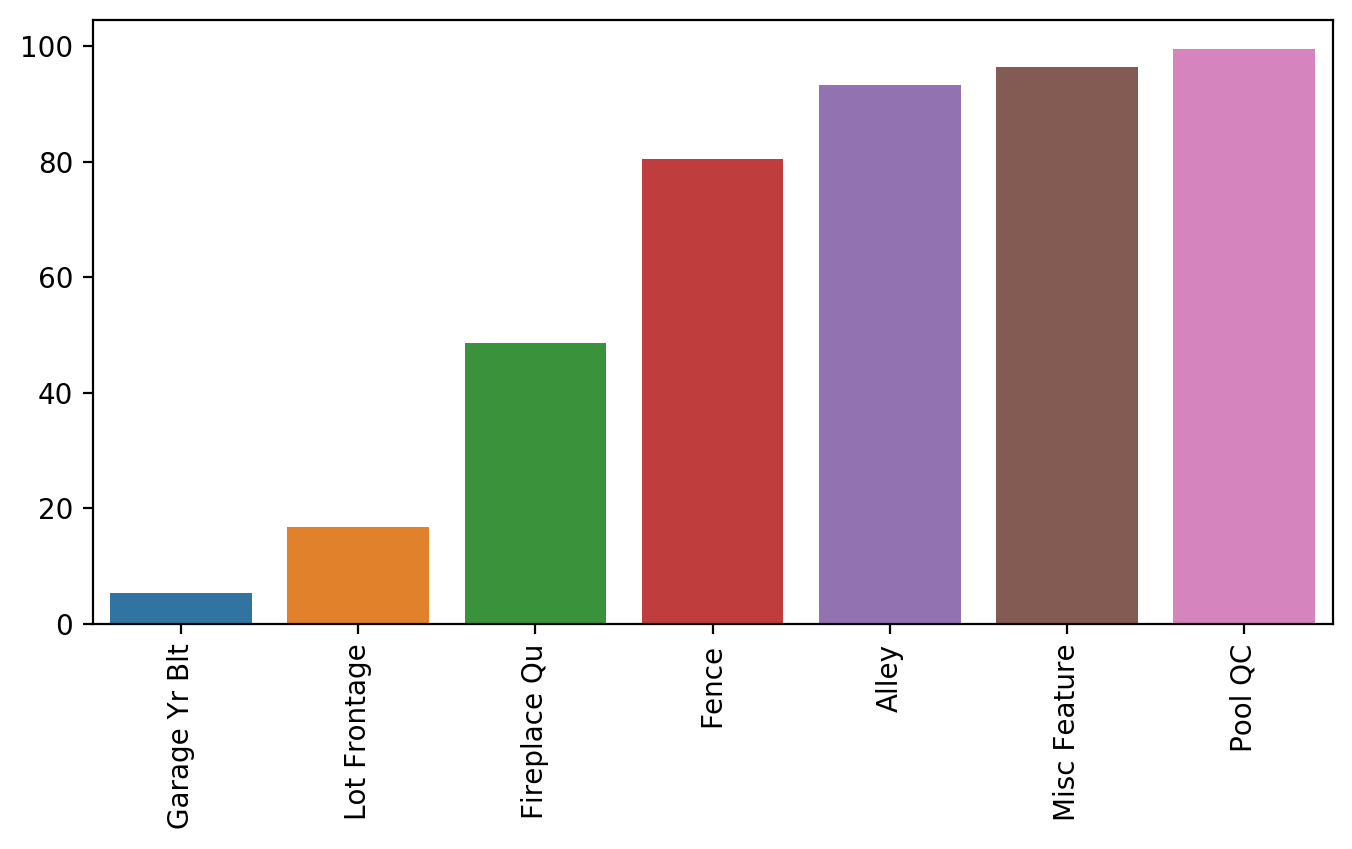

In [97]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degree

# In the below plot we can see that the string valued garage columns has been removed as the value has been modified

In [98]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0) # Fills the rows of the garage year build with 0. though this isn't a very good solution we don't have a better option

C:\Users\Manikandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

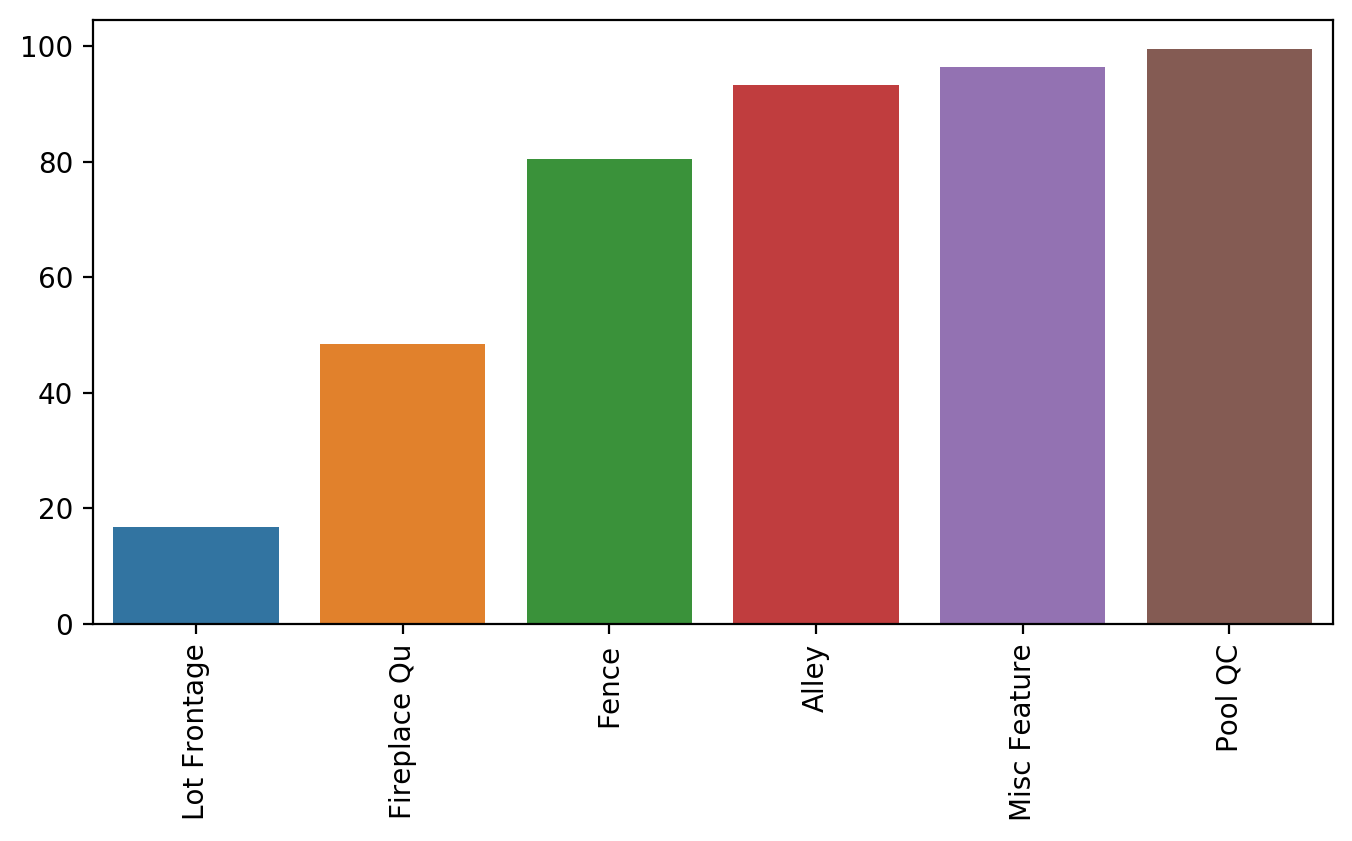

In [99]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degree


In [100]:
df = df.drop(['Pool QC', 'Misc Feature','Alley', 'Fence'], axis = 1) # We are dropping the columns as they have a lot of NaN values. we can fill it with zero but this is more easier.
# Decide on whether we want to drop the column or fill it based on the problem and the experience

(array([0, 1]), <a list of 2 Text xticklabel objects>)

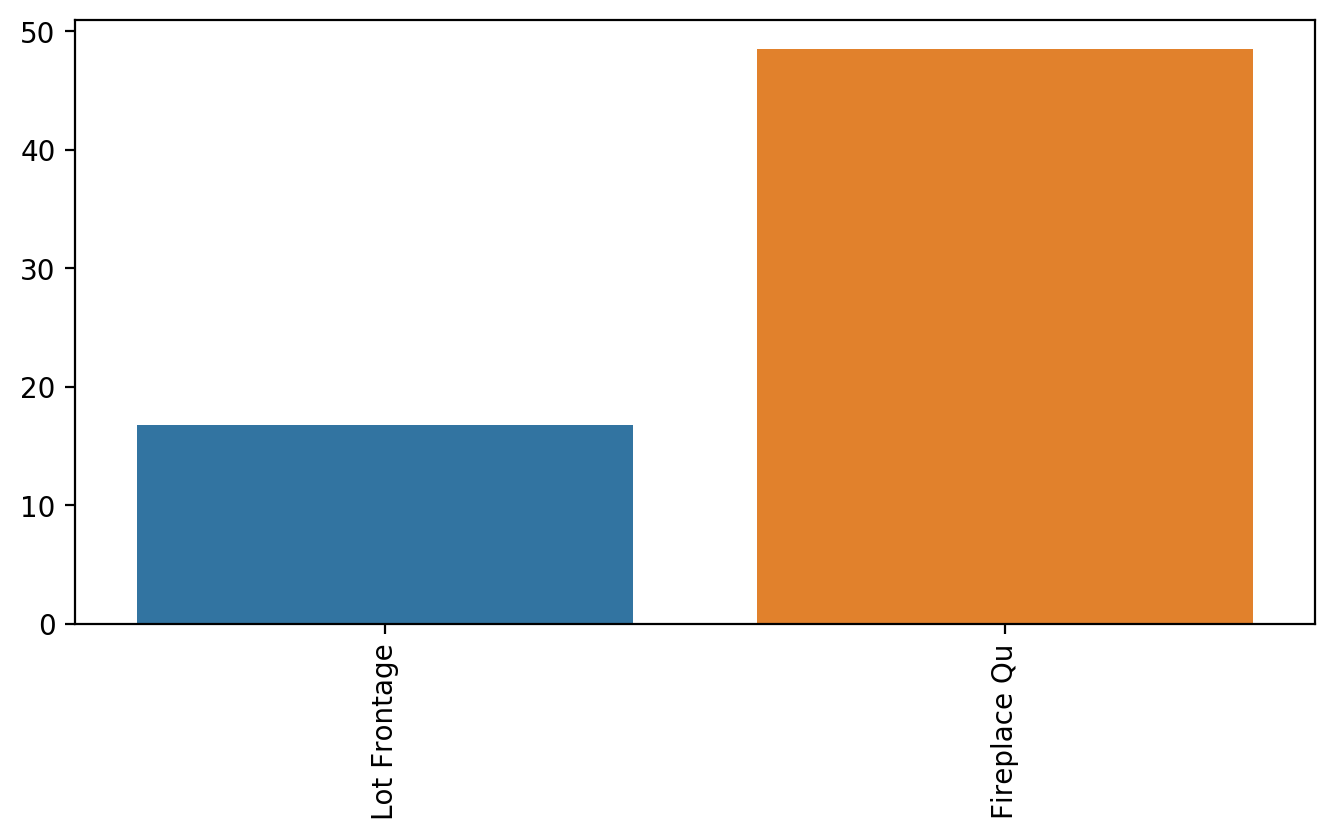

In [101]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degree

# Here we see that after we drop the column, we have only two columns which has missing values.

In [102]:
# From the above graph it is understood that, we donlt have enough missing datas to drop the feature but not too little is missing to just drop a couple of rows

In [103]:
df['Fireplace Qu'].value_counts() #To see that unique values of the column
# Since Fireplace Qu is a string column we will replace NA with the string value None

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [104]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None') # Filling the NA as None

In [106]:
df['Lot Frontage'].head() # Here we get that Lot Frontage is a numeric data and here is where we would have to think as to what to fill in the numerics with
# We need to figure out as to what is the statistical estimation that we can use based of another column inorder to fill this in.
# Here we can use the neighborhood value to estimate this
# The below given details are taken from the description of the dataframe
# Neighborhood : Physical location within Ames city limits
# LotFrontage : Linear feet of street connected to property

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

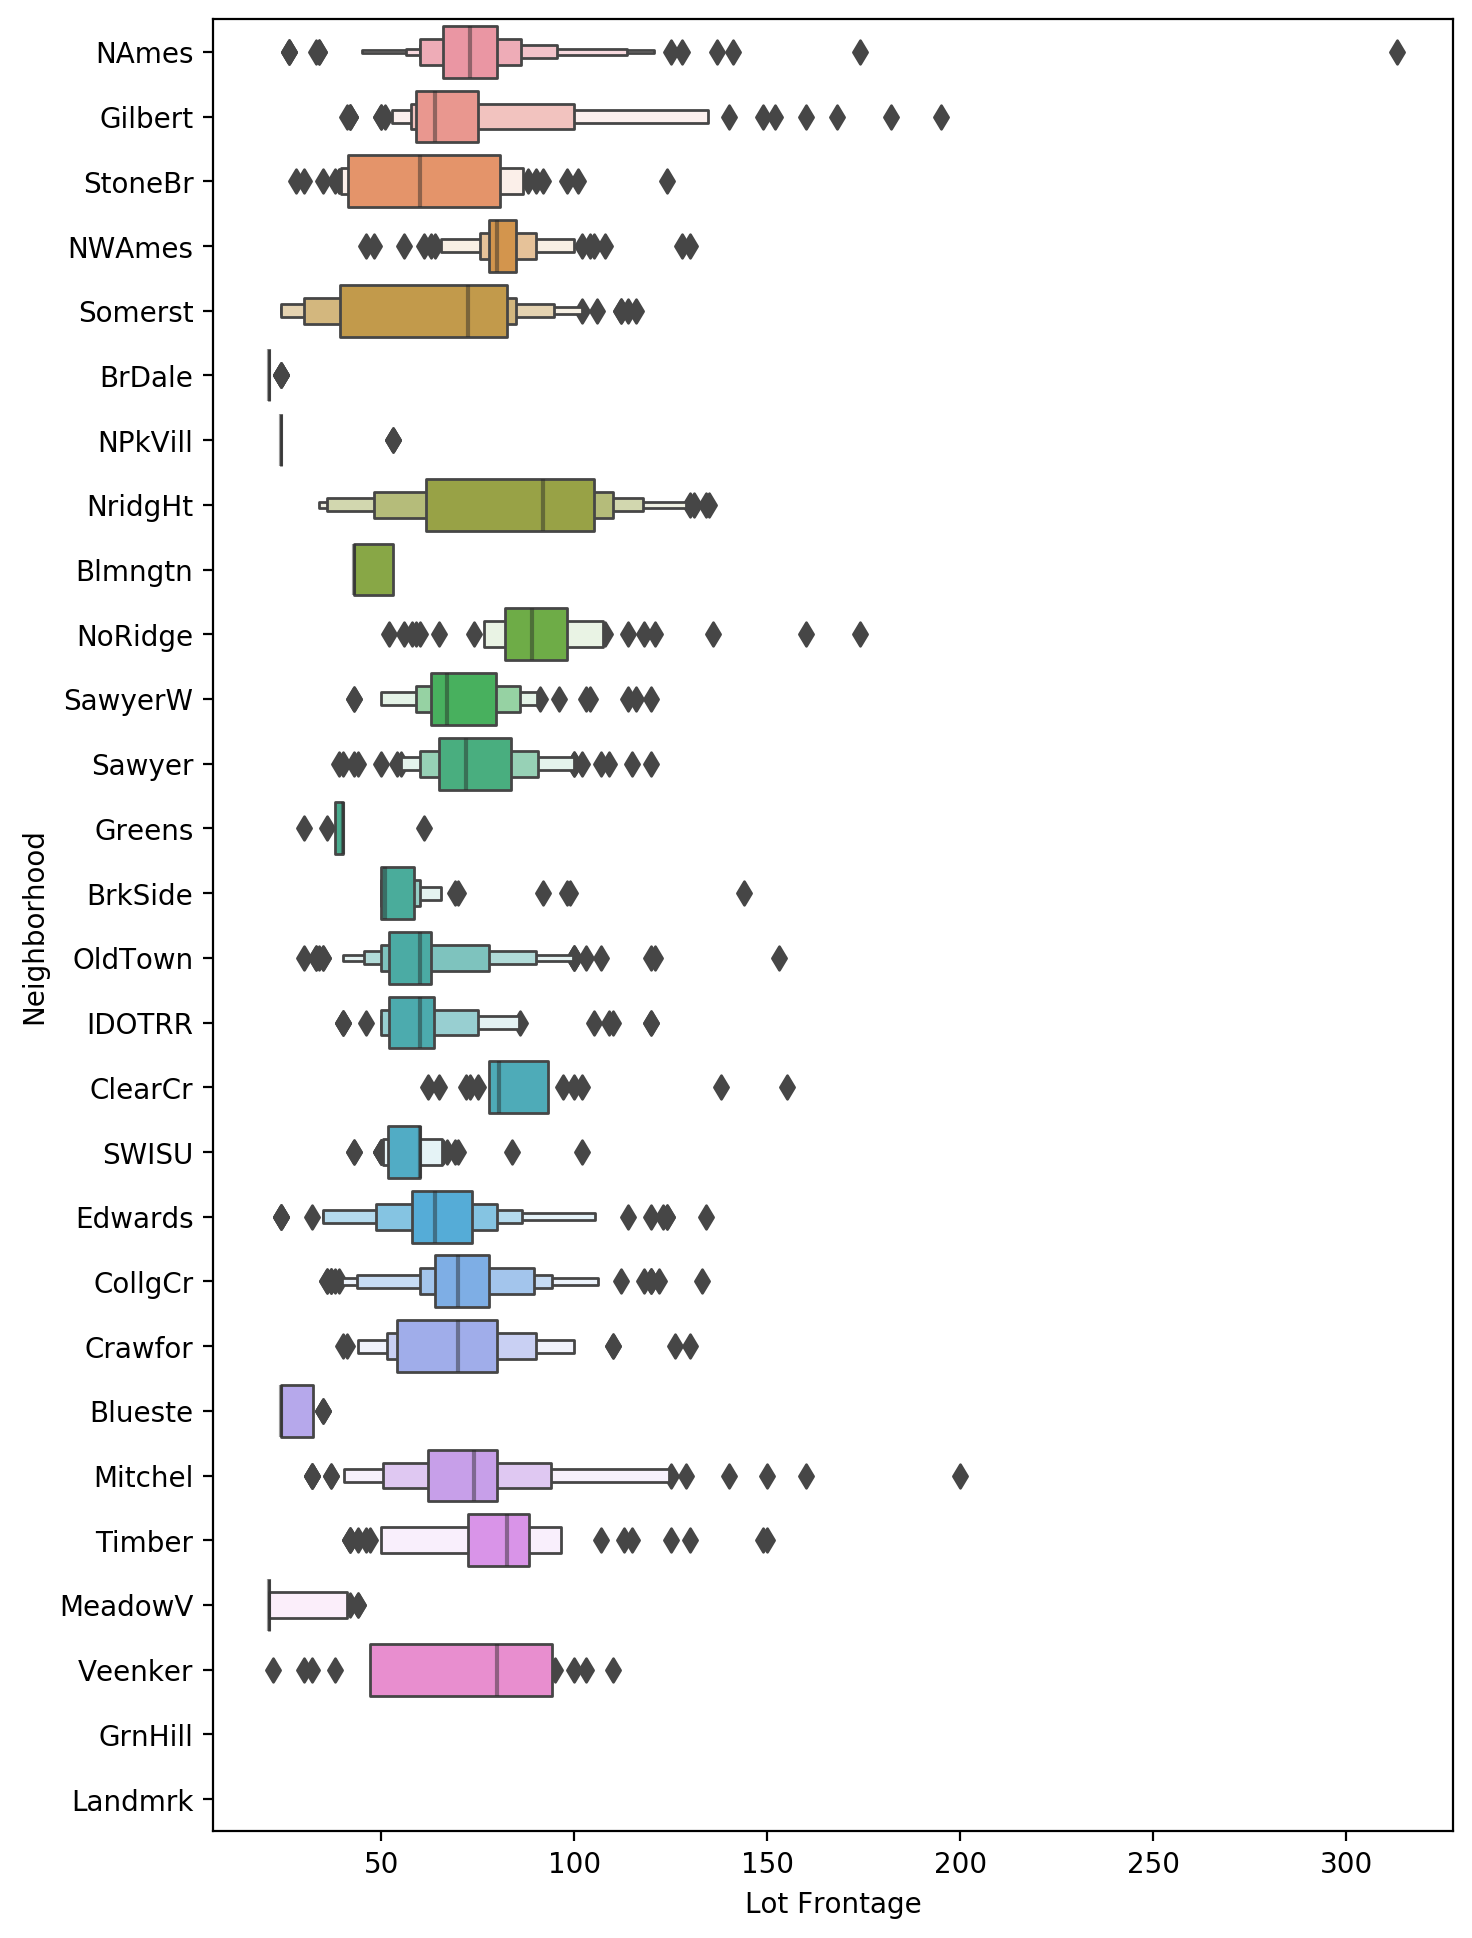

In [109]:
plt.figure(figsize=(8,12), dpi=200)
sns.boxenplot(x='Lot Frontage', y='Neighborhood', data=df, orient = 'h') # Creating a box plot between Lot Frontage and Neighborhood with orientation as h

In [110]:
df.groupby('Neighborhood')['Lot Frontage'].mean() # Gets the Mean of the Lot Frontage for the Neighborhood categories

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [112]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))
#The above syntax, fills the value of the row will the values mean and the mean is actually acted on the grouby
# It fills the NA Rows of the Lot Frontage column with the mean obtained from the Lot Frontage which are grouped by the Neighborhood category

In [117]:
df['Lot Frontage'].head()

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [119]:
df.isnull().sum() # Gives the count of the rows missing a value for each column
# For Lot Frontage we see that there are 3 values are missing.
# The 3 missing values might be because the groupby didn't actually make sense for those row
# so we can go ahead and fill those rows with 0 for the 3.

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
                 ..
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0


In [121]:
df['Lot Frontage']= df['Lot Frontage'].fillna(0) # Filling the three missing rows with 0

In [122]:
df.isnull().sum() # Gives the count of the rows missing a value for each column
# We see that there are no missing entries.

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
                 ..
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0


In [123]:
percent_nan = percent_missing(df) #Here we recalculate the percentage of missing items as the df has been changed by replacing the na rows
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y = percent_nan) # The X-values are the index names and the y are the corresponding values themselves
plt.xticks(rotation= 90) # Rotates the X ticks by 90 degree

ValueError: min() arg is an empty sequence

<Figure size 1600x800 with 0 Axes>

In [124]:
# From the above error we see that the min() arg is an empty sequence as there are no missing rows.

### DEALING WITH CATEGORICAL DATA - ENCODING OPTIONS

In [126]:
df = pd.read_csv('C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/Ames_NO_Missing_Data.csv') # Reading the Ames No Missing data file.
# Note we didn't save the file above as we had the No missing data provided with th ecourse, but in general we would have to save it for futue use

In [127]:
df.isnull().sum() # Here we can see that there are no missing datas in the df

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
                 ..
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0


In [128]:
df['MS SubClass'] = df['MS SubClass'].apply(str) # The MS Subclass is numeric by default so we are converting it into string . With it as the string we can wasily use dummy variables are get the string values

In [129]:
direction = pd.Series(['Up','Up','Down']) # Creating a Series Object with the values

In [130]:
direction

0      Up
1      Up
2    Down
dtype: object

In [133]:
pd.get_dummies(direction) # Automatically creates the dummy varibles. this takesn in single series columns and creates a column for each category with one hot encoding

,Down,Up
0,0,1
1,0,1
2,1,0


In [134]:
pd.get_dummies(direction, drop_first= True) # Since this is only two features we can drop one column. As we know if Up is 0 then it is down

,Up
0,1
1,1
2,0


In [135]:
df.select_dtypes(include='object') # This looks at the datatype for every single columnand checks if its equal to object
# The below list is only listed for those which have its datatype as object

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
5,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
6,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,Fin,TA,TA,Y,WD,Normal
7,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
8,120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
9,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
MS SubClass        2925 non-null object
MS Zoning          2925 non-null object
Lot Frontage       2925 non-null float64
Lot Area           2925 non-null int64
Street             2925 non-null object
Lot Shape          2925 non-null object
Land Contour       2925 non-null object
Utilities          2925 non-null object
Lot Config         2925 non-null object
Land Slope         2925 non-null object
Neighborhood       2925 non-null object
Condition 1        2925 non-null object
Condition 2        2925 non-null object
Bldg Type          2925 non-null object
House Style        2925 non-null object
Overall Qual       2925 non-null int64
Overall Cond       2925 non-null int64
Year Built         2925 non-null int64
Year Remod/Add     2925 non-null int64
Roof Style         2925 non-null object
Roof Matl          2925 non-null object
Exterior 1st       2925 non-null object
Exterior 2nd     

In [137]:
my_object_df = df.select_dtypes(include='object') # Assigning the above step to a varible for easier use, The list is only listed for those which have its datatype as object
my_object_df # gets the string features

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
5,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
6,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,Fin,TA,TA,Y,WD,Normal
7,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
8,120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
9,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [138]:
my_numeric_df = df.select_dtypes(exclude='object')# This exculdes the object datatypes and list the other datatypes
my_numeric_df # These are the numeric features

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
5,78.000000,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,6,2010,195500
6,41.000000,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,...,0,0,170,0,0,0,0,4,2010,213500
7,43.000000,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,82,0,0,144,0,0,1,2010,191500
8,39.000000,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,...,237,152,0,0,0,0,0,3,2010,236500
9,60.000000,7500,7,5,1999,1999,0.0,0.0,0.0,994.0,...,140,60,0,0,0,0,0,6,2010,189000


In [140]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True) # Creates dummies for the string features and drops the first columns as if the others are false then the first column has to be true

In [141]:
df_objects_dummies # gets the output, here we can see that there is dummies created for every signle category.
# As in in each column if there are differnet category then the columns are created for each unique category and the dummies are created

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [142]:
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1) # Concatenation of the numerial dataframe with the object dummies (i.e the string df for which the dummies where created) along the column

In [143]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
5,78.000000,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
6,41.000000,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,...,0,0,0,0,1,0,0,0,1,0
7,43.000000,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
8,39.000000,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,...,0,0,0,0,1,0,0,0,1,0
9,60.000000,7500,7,5,1999,1999,0.0,0.0,0.0,994.0,...,0,0,0,0,1,0,0,0,1,0


In [144]:
final_df.corr()['SalePrice'].sort_values() # gets the correlation of the column with respect to SalePrice and sort it

Exter Qual_TA            -0.591459
Kitchen Qual_TA          -0.527461
Fireplace Qu_None        -0.481740
Bsmt Qual_TA             -0.453022
Garage Finish_Unf        -0.422363
Mas Vnr Type_None        -0.395083
Garage Type_Detchd       -0.365209
Foundation_CBlock        -0.350087
Heating QC_TA            -0.338812
Lot Shape_Reg            -0.300738
MS Zoning_RM             -0.292661
Bsmt Exposure_No         -0.283246
Roof Style_Gable         -0.256806
MS SubClass_30           -0.234964
Garage Type_None         -0.226028
Garage Cond_None         -0.225746
Garage Finish_None       -0.225746
Garage Qual_None         -0.225746
Neighborhood_OldTown     -0.212042
Sale Type_WD             -0.205144
Neighborhood_NAmes       -0.188772
MS SubClass_50           -0.179005
Neighborhood_IDOTRR      -0.174880
Exterior 1st_Wd Sdng     -0.173195
Exterior 2nd_Wd Sdng     -0.167913
Neighborhood_Edwards     -0.167587
Garage Qual_Fa           -0.165818
BsmtFin Type 1_Rec       -0.157269
Bsmt Qual_Fa        

In [146]:
df.to_csv("C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/Nandhus_Final_DataFrame.csv",index=False) # to save the data frame to the desired path.